In [14]:
import numpy as np
import pandas as pd
import re

In [15]:
df = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
df[(df['Embarked'] == 'C') & (df['Fare'] > 200)].sort_values(by='Fare', ascending=True).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.500,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C


In [19]:
df['male'] = df['Sex'].apply(lambda sex: 1 if sex == 'male' else 0)

In [20]:
df[(df['male'] == 1) & (df['Pclass'] == 2)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
PassengerId,,,,,,,,,,,,
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S,1
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S,1
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S,1
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,1
71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S,1


In [21]:
df['Fare'].median(), \
df['Fare'].std()

(14.4542, 49.693428597180905)

In [22]:
len(df[(df['Age'] < 30) & (df['Survived'] == 1)])/len(df[(df['Age'] < 30)])*100,\
len(df[(df['Age'] > 60) & (df['Survived'] == 1)])/len(df[(df['Age'] > 60)])*100,

(40.625, 22.727272727272727)

In [23]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [24]:
233/(233+81)*100,\
109/(468+109)*100


(74.20382165605095, 18.890814558058924)

In [25]:
def name_fun(i):
    return i.split(',')[1].split(' ')[2]

df['First_name'] = df['Name'].apply(name_fun)

In [26]:
df['First_name'].head()


PassengerId
1       Owen
2       John
3      Laina
4    Jacques
5    William
Name: First_name, dtype: object

In [27]:
df['First_name'][df['male'] == 1].value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: First_name, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

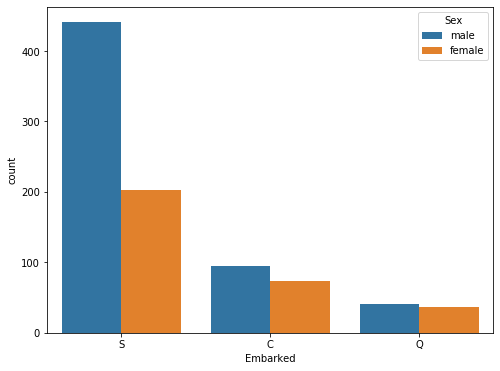

In [30]:
sns.countplot(x='Embarked', hue='Sex', data=df);
plt.savefig('int_plan_and_churn.png', dpi=300);